In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
mall_data = pd.read_csv('mall.csv',
                       names = ['Gender','Age', 'AnnualIncome', 'SpendingScore'],
                       index_col=0, header=1)
mall_data.head()

,Gender,Age,AnnualIncome,SpendingScore
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [3]:
mall_data.shape

(199, 4)

In [4]:
mall_data = mall_data.sample(frac=1, replace=False)

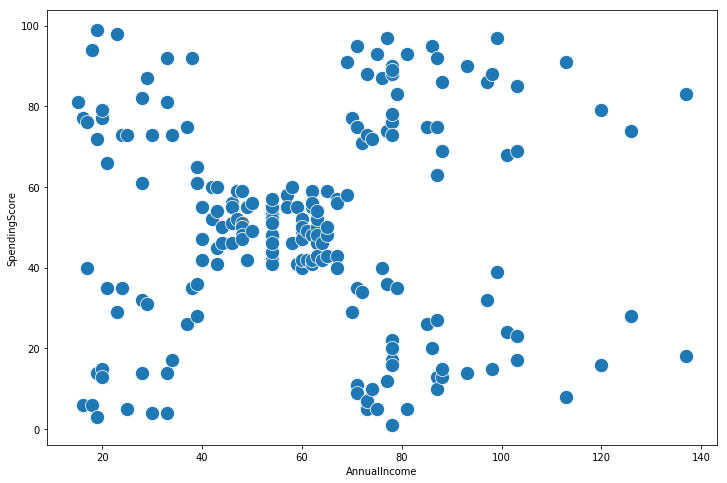

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot('AnnualIncome','SpendingScore', data = mall_data, s=200)
plt.show()

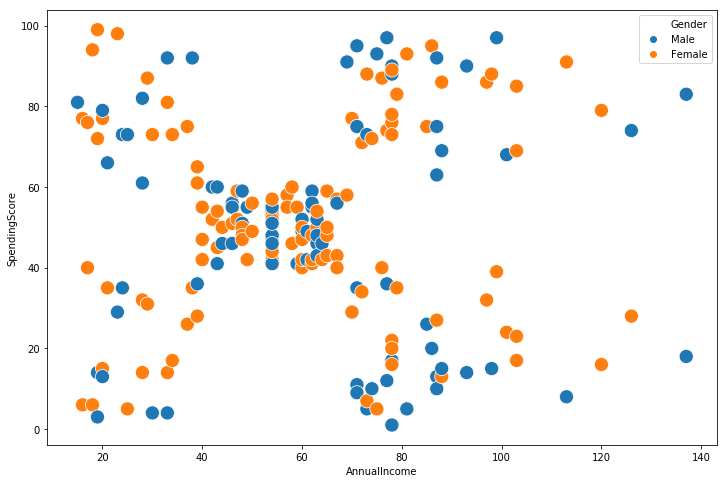

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot('AnnualIncome','SpendingScore', hue = 'Gender', data = mall_data, s=200)
plt.show()

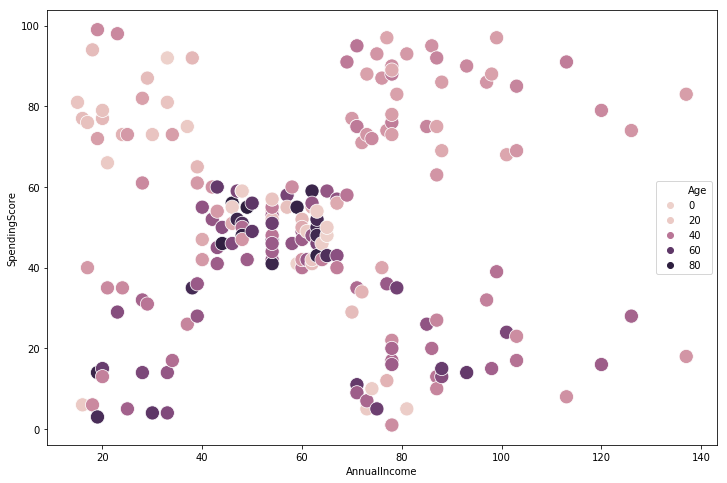

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot('AnnualIncome','SpendingScore', hue = 'Age', data = mall_data, s=200)
plt.show()

In [10]:
features = mall_data[[ 'AnnualIncome','SpendingScore' ]]
features.head()

,AnnualIncome,SpendingScore
2,15,81
3,16,6
4,16,77
5,17,40
6,17,76


In [11]:
X = np.array(features)
X[:10]

array([[15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14]])

In [13]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=3)
k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
cluster_label = k_mean.labels_
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1], dtype=int32)

In [15]:
centroids = k_mean.cluster_centers_
centroids

array([[44.39344262, 49.91803279],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

In [16]:
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X, cluster_label)
silhou_score

0.46824208542590284

In [23]:
colors  = ['green','blue','purple','red','grey']

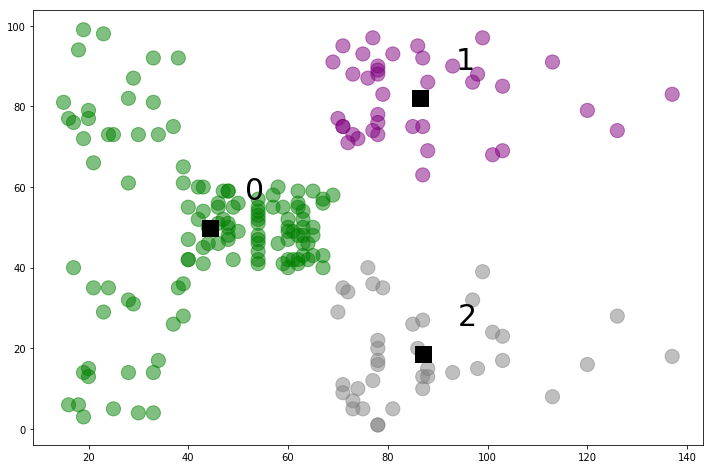

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(features['AnnualIncome'], 
            features['SpendingScore'], 
            s=200, c=cluster_label, 
            cmap=matplotlib.colors.ListedColormap(colors), 
            alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='k', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)


In [28]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
cluster_label = k_mean.labels_
cluster_label

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3, 4,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3], dtype=int32)

In [30]:
centroids = k_mean.cluster_centers_
centroids

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.81818182, 20.09090909],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852]])

In [31]:
silhou_score = silhouette_score(X, cluster_label)
silhou_score

0.5552295017995841

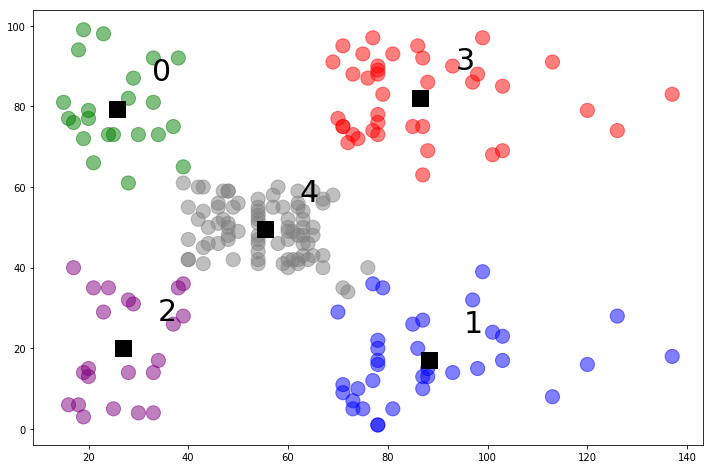

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(features['AnnualIncome'], 
            features['SpendingScore'], 
            s=200, c=cluster_label, 
            cmap=matplotlib.colors.ListedColormap(colors), 
            alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='k', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [33]:
from sklearn.cluster import AgglomerativeClustering

agglo_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')

agglo_cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [34]:
agglo_cluster_label = agglo_cluster.labels_
agglo_cluster_label

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1])

In [35]:
silhou_score = silhouette_score(X, agglo_cluster_label)
silhou_score

0.5542313841001306

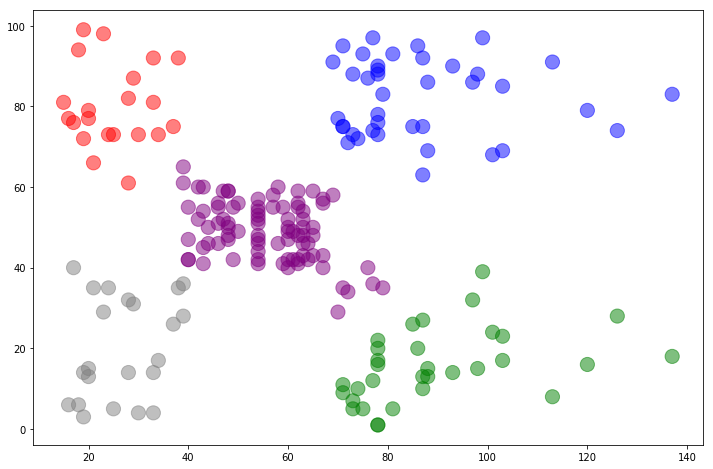

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(features['AnnualIncome'], 
            features['SpendingScore'], 
            s=200, c=agglo_cluster_label, 
            cmap=matplotlib.colors.ListedColormap(colors), 
            alpha=0.5)

In [37]:
from sklearn.cluster import MeanShift
cluster_mean_shift = MeanShift(bandwidth=25).fit(X)

In [38]:
centroids = cluster_mean_shift.cluster_centers_
centroids

array([[54.70238095, 49.36904762],
       [82.25714286, 82.17142857],
       [82.15151515, 18.15151515],
       [27.6       , 77.08      ],
       [26.81818182, 20.09090909]])

In [39]:
cluster_labels = cluster_mean_shift.labels_
cluster_labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1])

In [40]:
silhou_score = silhouette_score(X, cluster_labels)
silhou_score

0.5526558484447762

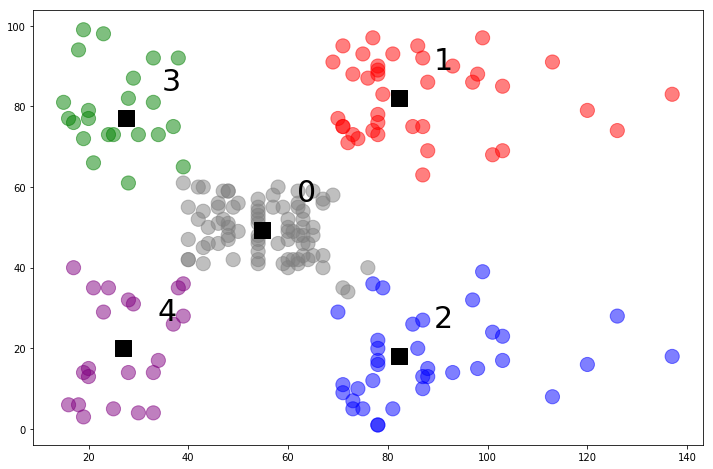

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(features['AnnualIncome'], 
            features['SpendingScore'], 
            s=200, c=cluster_label, 
            cmap=matplotlib.colors.ListedColormap(colors), 
            alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='k', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)